In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sgl

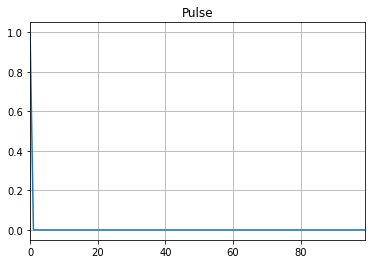

In [2]:
def pulse(n):
    pulse = np.concatenate((np.ones(1), np.zeros(n-1)))
    return pulse

plt.title("Pulse")
plt.plot(pulse(100))
plt.grid()
plt.margins(x=0)

In [3]:
def get_sinusoid(amp, freq, sample_freq, n_sample):
    n = np.arange(0, n_sample)
    return n/sample_freq, amp * np.sin(freq/sample_freq*2*np.pi*n)

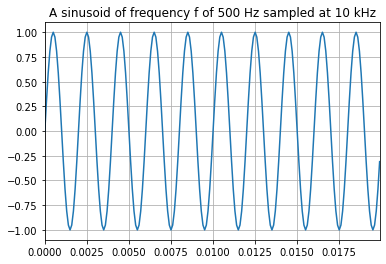

In [4]:
x, s = get_sinusoid(1, 500, 10000, 200)
plt.title("A sinusoid of frequency f of 500 Hz sampled at 10 kHz")
plt.plot(x, s)
plt.grid()
plt.margins(x=0)

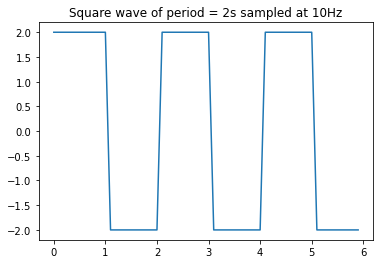

In [5]:
def get_squarewave(amp, freq, sample_freq, n_sample):
    x, sin = get_sinusoid(1, freq, sample_freq, n_sample) 
    sin[sin >= 0] = 1
    sin[sin < 0] = -1
    return x, amp * sin

x, sq = get_squarewave(2, 0.5, 10, 60)
plt.title("Square wave of period = 2s sampled at 10Hz")
plt.plot(x, sq)


In [6]:
import zplane

/home/doriano/PycharmProjects/tp_signal/venv/lib/python3.8/site-packages/scipy/signal/filter_design.py:473: RuntimeWarning: divide by zero encountered in true_divide
  h = (npp_polyval(zm1, b, tensor=False) /


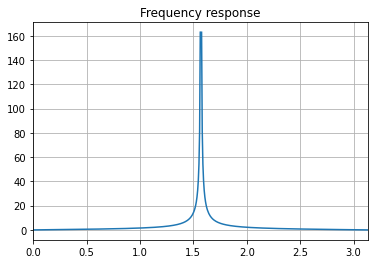

In [7]:
b = [1, 0, -1]
a = [1, -2*np.cos(np.pi/2), 1]

x, y = sgl.freqz(b, a)
plt.title("Frequency response")
plt.plot(x, abs(y))
plt.grid()
plt.margins(x=0)

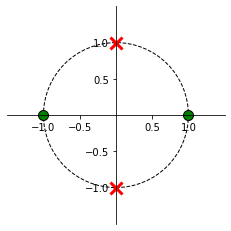

(array([-1.,  1.]), array([1.11022302e-16+1.j, 1.11022302e-16-1.j]), 1.0)

In [8]:
zplane.zplane(b, np.array(a))

In [9]:
x, s = get_sinusoid(1, 500, 10000, 200)
r = sgl.lfilter(b, a, s)

n, favant = sgl.freqz(s, [1])
n, fapr = sgl.freqz(r, [1])

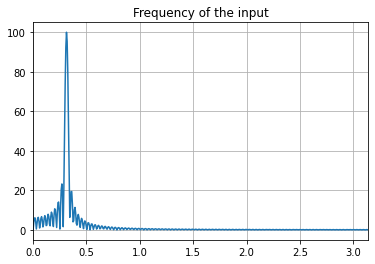

In [10]:
plt.title("Frequency of the input")
plt.plot(n, abs(favant))
plt.grid()
plt.margins(x=0)

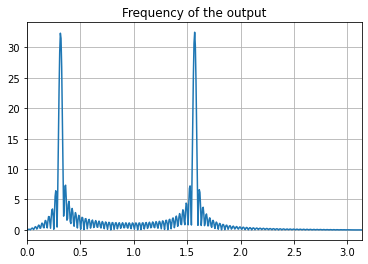

In [11]:
plt.title("Frequency of the output")
plt.plot(n, abs(fapr))
plt.grid()
plt.margins(x=0)

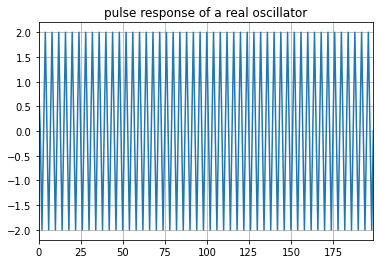

In [12]:
p = pulse(200)
pr = sgl.lfilter(b, a, p)

plt.title("pulse response of a real oscillator")
plt.plot(pr)
plt.grid()
plt.margins(x=0)

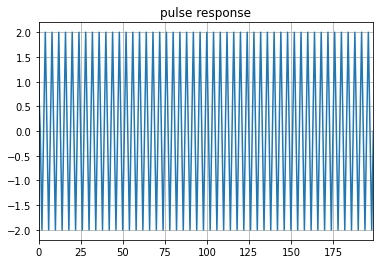

In [13]:
x, sq = get_squarewave(2, 0.5, 10, 60)
sqr = sgl.lfilter(b, a, sq)

plt.title("pulse response")
plt.plot(pr)
plt.grid()
plt.margins(x=0)